In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import numpy as np

In [3]:
from IPython.display import Image
from graphviz import Digraph

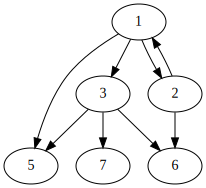

In [4]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26'])

# Visualize the graph
dot

In [5]:
class Node:
    
    def __init__(self, value):
        self.val = value
        self.right = None
        self.left = None
        self.parent = None
        self.height = 1
        self.balance = 0

def get_height(node):
    if not node:
        return 0
    return node.height

def update_height(node):
    if not node:
        return
    node.height = 1 + max(get_height(node.left), get_height(node.right))
        
def get_balance(node):
    if not node:
        return 0
    return node.balance  

def update_balance(node):
    if not node:
        return 
    node.balance = get_height(node.left) - get_height(node.right)

def buildBinaryTree(nodes):
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    root = binaryTree(nodes, 0, len(nodes) - 1)
    update_tree(root)
    return root
        
def binaryTree(nodes, start, end):
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    return root

def update_tree(node):
    if not node:
        return
    update_tree(node.left)
    update_tree(node.right)
    update_height(node)
    update_balance(node)

def visualize_tree(tree):
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            label = f'{tree.val}\nBal: {tree.balance}'
            dot.node(name=str(tree), label=label)

        # Add nodes
        if tree.left:
            label = f'{tree.left.val}\nBal: {tree.left.balance}'
            dot.node(name=str(tree.left), label=label)
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            label = f'{tree.right.val}\nBal: {tree.right.balance}'
            dot.node(name=str(tree.right), label=label)
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Return the graph
    return dot

def is_balanced(node):
    if not node:
        return True
    
    balance = get_balance(node)
    if balance > 1 or balance < -1:
        return False
    
    return is_balanced(node.left) and is_balanced(node.right)

def insert(nodes, val):
    if nodes is None:
        return Node(val)

    if nodes.val == val:
        return nodes

    if val < nodes.val:
        nodes.left = insert(nodes.left, val)
    else:
        nodes.right = insert(nodes.right, val)
    
    update_height(nodes)
    update_balance(nodes)
    return nodes

def minValueNode(node):
    current = node
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
    return current

def delete(nodes, val):
    if nodes == None:  
        return nodes

    if val < nodes.val:
        nodes.left = delete(nodes.left, val)
    elif val > nodes.val:
        nodes.right = delete(nodes.right, val)
    else:
        # Node with only one child or no child
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        nodes.val = temp.val
        nodes.right = delete(nodes.right, temp.val)
        
    update_height(nodes)
    update_balance(nodes)
    return nodes

def find_node(root, value):
    if root is None or root.val == value:
        return root
    if value < root.val:
        return find_node(root.left, value)
    else:
        return find_node(root.right, value)

def find_first_common_ancestor(root, val1, val2):
    node1 = find_node(root, val1)
    node2 = find_node(root, val2)
    if not node1 or not node2:
        return None
    
    while root:
        if val1 < root.val and val2 < root.val:
            root = root.left
        elif val1 > root.val and val2 > root.val:
            root = root.right
        else:
            return root
    return None

def left_rotate(rotation, x):
    y = x.right
    x.right = y.left
    if y.left is not None:
        y.left.parent = x
    y.parent = x.parent
    if x.parent is None:
        rotation = y
    elif x == x.parent.left:
        x.parent.left = y
    else:
        x.parent.right = y
    y.left = x
    x.parent = y
    update_height(x)
    update_height(y)
    update_balance(x)
    update_balance(y)
    return rotation

def right_rotate(rotation, y):
    x = y.left
    y.left = x.right
    if x.right is not None:
        x.right.parent = y
    x.parent = y.parent
    if y.parent is None:
        rotation = x
    elif y == y.parent.left:
        y.parent.left = x
    else:
        y.parent.right = x
    x.right = y
    y.parent = x
    update_height(y)
    update_height(x)
    update_balance(y)
    update_balance(x)
    return rotation

def left_right_rotate(rotation, node):
    rotation = left_rotate(rotation, node.left)
    rotation = right_rotate(rotation, node)
    return rotation

def right_left_rotate(rotation, node):
    rotation = right_rotate(rotation, node.right)
    rotation = left_rotate(rotation, node)
    return rotation

def rotate(tree, node_val, rotation_type):
    rotation = tree  # Start with the original tree
    
    node = find_node(rotation, node_val)
    if not node:
        raise ValueError("Node not found in the tree")
    
    if rotation_type == 'left':
        rotation = left_rotate(rotation, node)
    elif rotation_type == 'right':
        rotation = right_rotate(rotation, node)
    elif rotation_type == 'left-right':
        rotation = left_right_rotate(rotation, node)
    elif rotation_type == 'right-left':
        rotation = right_left_rotate(rotation, node)
    else:
        raise ValueError("Invalid rotation type")
    
    return rotation

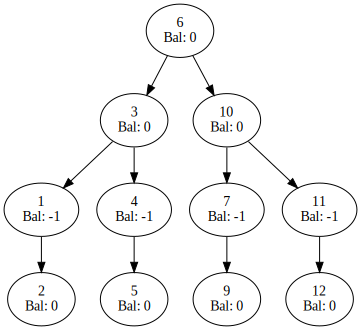

In [22]:
nodes = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12]
root = buildBinaryTree(nodes)
visualize_tree(root)

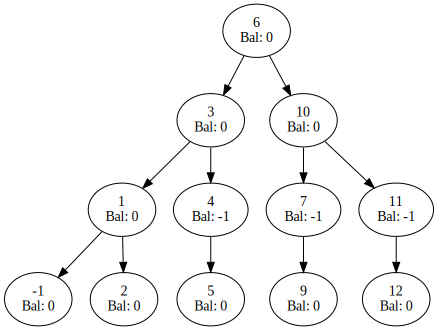

In [23]:
insert(root, -1)
visualize_tree(root)

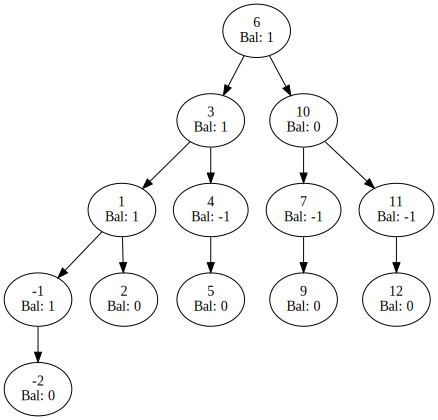

In [24]:
insert(root, -2)
visualize_tree(root)

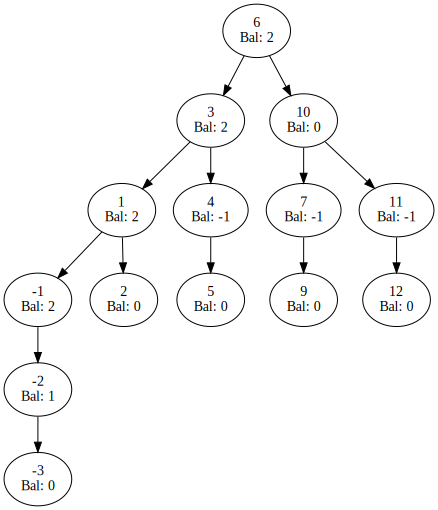

In [25]:
insert(root, -3)
visualize_tree(root)